In [1]:
import sys
sys.path.append("..") 

from src.pertdata import PertData

norman = PertData.from_repo("norman", save_dir="../data")

Dataset directory already exists: ../data\norman
Loading dataset: norman


In [2]:
print(norman)
print(norman.adata)

X = norman.adata.X
y_pert = norman.adata.obs["condition"]
y_ctrl = norman.adata.obs["control"]
gene_names = norman.adata.var["gene_name"]

print(f"X.shape={X.shape}")  # type: ignore
print(f"y_pert.shape={y_pert.shape}")
print(f"y_ctrl.shape={y_ctrl.shape}")
print(f"gene_names.shape={gene_names.shape}")

PertData object
    name: norman
    path: ../data\norman
    adata: AnnData object with n_obs x n_vars = 91205 x 5045
AnnData object with n_obs × n_vars = 91205 × 5045
    obs: 'condition', 'cell_type', 'dose_val', 'control', 'condition_name', 'condition_fixed'
    var: 'gene_name'
    uns: 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'
    layers: 'counts'
X.shape=(91205, 5045)
y_pert.shape=(91205,)
y_ctrl.shape=(91205,)
gene_names.shape=(5045,)


In [6]:
filter_mask = ~norman.adata.obs["condition_fixed"].str.contains(r"\+")
indexes_to_keep = filter_mask[filter_mask].index
adata_single = norman.adata[indexes_to_keep].copy()  # type: ignore

print(adata_single)
print(f"Unique perturbations: {len(set(adata_single.obs['condition_fixed']))}")
print("Number of samples per condition:")
print(adata_single.obs["condition_fixed"].value_counts())

AnnData object with n_obs × n_vars = 55760 × 5045
    obs: 'condition', 'cell_type', 'dose_val', 'control', 'condition_name', 'condition_fixed'
    var: 'gene_name'
    uns: 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'
    layers: 'counts'
Unique perturbations: 106
Number of samples per condition:
condition_fixed
ctrl      7353
KLF1      1641
BAK1      1171
CEBPE     1039
ETS2      1031
          ... 
CDKN1C     165
NIT1       165
ZBTB10     145
HES7       122
PLK4        97
Name: count, Length: 106, dtype: int64


In [7]:
# Number of top genes to select.
d = 128

# Compute the gene variances.
gene_variances = adata_single.X.toarray().var(axis=0)  # type: ignore

# Sort the gene variances in descending order and get the indexes of the top d genes.
sorted_indexes = gene_variances.argsort()[::-1]

# Get the indexes of the top d genes.
top_gene_indexes = sorted_indexes[:d]

# Get the gene names of the top d genes.
top_genes = adata_single.var["gene_name"].iloc[top_gene_indexes]

# Get the variances of the top d genes.
top_variances = gene_variances[top_gene_indexes]

# Print the top d genes with the highest variances.
print(f"Top {d} genes with highest variances:")
for gene, variance in zip(top_genes, top_variances):
    print(f"{gene:15}: {variance:.2f}")

# Create a new AnnData object with only the top d genes.
adata_single_top_genes = adata_single[:, top_gene_indexes].copy()

Top 128 genes with highest variances:
HBZ            : 1.69
HIST1H4C       : 1.69
HBG2           : 1.15
HIST1H1C       : 0.85
HBG1           : 0.73
NEAT1          : 0.71
UBE2S          : 0.62
GYPB           : 0.61
MALAT1         : 0.58
TOP2A          : 0.58
VIM            : 0.57
HMGB2          : 0.56
SH3BGRL3       : 0.55
RP11-301G19.1  : 0.53
HIST1H2BJ      : 0.52
CENPF          : 0.49
GAL            : 0.48
MT-ND6         : 0.48
RP11-717F1.1   : 0.47
APOE           : 0.47
PTTG1          : 0.47
CKS1B          : 0.47
CKS2           : 0.46
TUBB           : 0.46
GYPA           : 0.46
KIAA0101       : 0.46
S100A11        : 0.45
PHF19          : 0.44
PSMA4          : 0.44
HNRNPH1        : 0.44
CACYBP         : 0.43
KRT18          : 0.43
BTG1           : 0.43
LDHA           : 0.43
SLC25A37       : 0.42
CFD            : 0.42
AIF1           : 0.42
LGALS1         : 0.41
NME1           : 0.41
HSPA8          : 0.41
BLVRB          : 0.41
HN1            : 0.41
SRM            : 0.41
BIRC5          :

In [12]:
adata_single_top_genes.var["gene_name"]


gene_id
ENSG00000130656         HBZ
ENSG00000197061    HIST1H4C
ENSG00000196565        HBG2
ENSG00000187837    HIST1H1C
ENSG00000213934        HBG1
                     ...   
ENSG00000136156       ITM2B
ENSG00000143401      ANP32E
ENSG00000120833       SOCS2
ENSG00000250722       SEPP1
ENSG00000091317       CMTM6
Name: gene_name, Length: 128, dtype: category
Categories (128, object): ['AC079466.1', 'AIF1', 'ALAS2', 'ANP32E', ..., 'UFD1L', 'VAMP8', 'VIM', 'WDR43']

In [10]:
adata_single_top_genes.obs["condition_fixed"]


cell_barcode
AAACCTGAGGCATGTG-1    TSC22D1
AAACCTGCACGAAGCA-1       ctrl
AAACCTGCAGCCTTGG-1      MAML2
AAACCTGCATCTCCCA-1      CEBPE
AAACCTGGTATAATGG-1       ctrl
                       ...   
TTTGTCAGTCAGAATA-8       ctrl
TTTGTCATCAGTACGT-8      FOXA3
TTTGTCATCCACTCCA-8      CELF2
TTTGTCATCCCAACGG-8     BCORL1
TTTGTCATCTGGCGAC-8     MAP4K3
Name: condition_fixed, Length: 55760, dtype: category
Categories (106, object): ['AHR', 'ARID1A', 'ARRDC3', 'ATL1', ..., 'ZBTB25', 'ZC3HAV1', 'ZNF318', 'ctrl']

In [18]:
import scvi

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [19]:
sc.pp.filter_genes(adata_single_top_genes, min_cells=10)

In [20]:
adata_single_top_genes

AnnData object with n_obs × n_vars = 55760 × 128
    obs: 'condition', 'cell_type', 'dose_val', 'control', 'condition_name', 'condition_fixed'
    var: 'gene_name', 'n_cells'
    uns: 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20'
    layers: 'counts'

In [21]:
scvi.model.SCVI.setup_anndata(adata_single_top_genes)
vae = scvi.model.SCVI(adata_single_top_genes)
vae.train()


c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\data\fields\_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Epoch 1/143:   0%|          | 0/143 [00:00<?, ?it/s]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 2/143:   1%|          | 1/143 [00:04<10:46,  4.55s/it, v_num=1, train_loss_step=183, train_loss_epoch=200]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 3/143:   1%|▏         | 2/143 [00:09<10:49,  4.61s/it, v_num=1, train_loss_step=180, train_loss_epoch=182]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 4/143:   2%|▏         | 3/143 [00:13<10:27,  4.48s/it, v_num=1, train_loss_step=176, train_loss_epoch=174]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 5/143:   3%|▎         | 4/143 [00:18<10:35,  4.57s/it, v_num=1, train_loss_step=165, train_loss_epoch=168]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 6/143:   3%|▎         | 5/143 [00:22<10:39,  4.64s/it, v_num=1, train_loss_step=161, train_loss_epoch=163]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 7/143:   4%|▍         | 6/143 [00:27<10:38,  4.66s/it, v_num=1, train_loss_step=162, train_loss_epoch=159]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 8/143:   5%|▍         | 7/143 [00:32<10:34,  4.67s/it, v_num=1, train_loss_step=155, train_loss_epoch=157]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 9/143:   6%|▌         | 8/143 [00:37<10:40,  4.75s/it, v_num=1, train_loss_step=152, train_loss_epoch=154]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 10/143:   6%|▋         | 9/143 [00:42<10:34,  4.74s/it, v_num=1, train_loss_step=152, train_loss_epoch=153]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 11/143:   7%|▋         | 10/143 [00:46<10:19,  4.66s/it, v_num=1, train_loss_step=158, train_loss_epoch=151]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 12/143:   8%|▊         | 11/143 [00:51<10:13,  4.64s/it, v_num=1, train_loss_step=151, train_loss_epoch=150]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 13/143:   8%|▊         | 12/143 [00:55<09:54,  4.54s/it, v_num=1, train_loss_step=150, train_loss_epoch=149]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 14/143:   9%|▉         | 13/143 [00:59<09:48,  4.53s/it, v_num=1, train_loss_step=151, train_loss_epoch=148]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 15/143:  10%|▉         | 14/143 [01:04<09:37,  4.47s/it, v_num=1, train_loss_step=150, train_loss_epoch=148]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 16/143:  10%|█         | 15/143 [01:08<09:39,  4.52s/it, v_num=1, train_loss_step=151, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 17/143:  11%|█         | 16/143 [01:13<09:28,  4.48s/it, v_num=1, train_loss_step=148, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 18/143:  12%|█▏        | 17/143 [01:17<09:21,  4.45s/it, v_num=1, train_loss_step=148, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 19/143:  13%|█▎        | 18/143 [01:21<09:08,  4.39s/it, v_num=1, train_loss_step=147, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 20/143:  13%|█▎        | 19/143 [01:26<09:02,  4.38s/it, v_num=1, train_loss_step=146, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 21/143:  14%|█▍        | 20/143 [01:30<09:01,  4.40s/it, v_num=1, train_loss_step=146, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 22/143:  15%|█▍        | 21/143 [01:35<08:59,  4.42s/it, v_num=1, train_loss_step=144, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 23/143:  15%|█▌        | 22/143 [01:39<08:50,  4.38s/it, v_num=1, train_loss_step=150, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 24/143:  16%|█▌        | 23/143 [01:43<08:44,  4.37s/it, v_num=1, train_loss_step=145, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 25/143:  17%|█▋        | 24/143 [01:48<08:43,  4.40s/it, v_num=1, train_loss_step=150, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 26/143:  17%|█▋        | 25/143 [01:52<08:40,  4.41s/it, v_num=1, train_loss_step=147, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 27/143:  18%|█▊        | 26/143 [01:57<08:37,  4.42s/it, v_num=1, train_loss_step=151, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 28/143:  19%|█▉        | 27/143 [02:01<08:31,  4.41s/it, v_num=1, train_loss_step=141, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 29/143:  20%|█▉        | 28/143 [02:05<08:28,  4.42s/it, v_num=1, train_loss_step=147, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 30/143:  20%|██        | 29/143 [02:10<08:34,  4.51s/it, v_num=1, train_loss_step=146, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 31/143:  21%|██        | 30/143 [02:15<08:36,  4.57s/it, v_num=1, train_loss_step=149, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 32/143:  22%|██▏       | 31/143 [02:20<08:36,  4.61s/it, v_num=1, train_loss_step=147, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 33/143:  22%|██▏       | 32/143 [02:24<08:32,  4.62s/it, v_num=1, train_loss_step=145, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 34/143:  23%|██▎       | 33/143 [02:29<08:26,  4.60s/it, v_num=1, train_loss_step=146, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 35/143:  24%|██▍       | 34/143 [02:33<08:18,  4.58s/it, v_num=1, train_loss_step=145, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 36/143:  24%|██▍       | 35/143 [02:38<08:08,  4.53s/it, v_num=1, train_loss_step=147, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 37/143:  25%|██▌       | 36/143 [02:42<08:01,  4.50s/it, v_num=1, train_loss_step=143, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 38/143:  26%|██▌       | 37/143 [02:47<07:56,  4.50s/it, v_num=1, train_loss_step=149, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 39/143:  27%|██▋       | 38/143 [02:51<07:53,  4.51s/it, v_num=1, train_loss_step=142, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 40/143:  27%|██▋       | 39/143 [02:56<07:44,  4.47s/it, v_num=1, train_loss_step=148, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 41/143:  28%|██▊       | 40/143 [03:00<07:43,  4.50s/it, v_num=1, train_loss_step=148, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 42/143:  29%|██▊       | 41/143 [03:05<07:43,  4.54s/it, v_num=1, train_loss_step=147, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 43/143:  29%|██▉       | 42/143 [03:09<07:39,  4.55s/it, v_num=1, train_loss_step=151, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 44/143:  30%|███       | 43/143 [03:14<07:33,  4.53s/it, v_num=1, train_loss_step=152, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 45/143:  31%|███       | 44/143 [03:18<07:23,  4.48s/it, v_num=1, train_loss_step=143, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 46/143:  31%|███▏      | 45/143 [03:23<07:18,  4.47s/it, v_num=1, train_loss_step=146, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 47/143:  32%|███▏      | 46/143 [03:27<07:12,  4.46s/it, v_num=1, train_loss_step=146, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 48/143:  33%|███▎      | 47/143 [03:31<07:04,  4.42s/it, v_num=1, train_loss_step=148, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 49/143:  34%|███▎      | 48/143 [03:36<06:55,  4.38s/it, v_num=1, train_loss_step=149, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 50/143:  34%|███▍      | 49/143 [03:40<06:52,  4.39s/it, v_num=1, train_loss_step=153, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 51/143:  35%|███▍      | 50/143 [03:45<06:48,  4.40s/it, v_num=1, train_loss_step=149, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 52/143:  36%|███▌      | 51/143 [03:49<06:46,  4.41s/it, v_num=1, train_loss_step=148, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 53/143:  36%|███▋      | 52/143 [03:53<06:41,  4.42s/it, v_num=1, train_loss_step=144, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 54/143:  37%|███▋      | 53/143 [03:58<06:36,  4.40s/it, v_num=1, train_loss_step=146, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 55/143:  38%|███▊      | 54/143 [04:02<06:27,  4.35s/it, v_num=1, train_loss_step=146, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 56/143:  38%|███▊      | 55/143 [04:06<06:26,  4.39s/it, v_num=1, train_loss_step=151, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 57/143:  39%|███▉      | 56/143 [04:11<06:19,  4.36s/it, v_num=1, train_loss_step=149, train_loss_epoch=145]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 58/143:  40%|███▉      | 57/143 [04:15<06:13,  4.35s/it, v_num=1, train_loss_step=151, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 59/143:  41%|████      | 58/143 [04:19<06:08,  4.34s/it, v_num=1, train_loss_step=148, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 60/143:  41%|████▏     | 59/143 [04:24<06:06,  4.36s/it, v_num=1, train_loss_step=145, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 61/143:  42%|████▏     | 60/143 [04:28<06:02,  4.37s/it, v_num=1, train_loss_step=149, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 62/143:  43%|████▎     | 61/143 [04:33<05:58,  4.37s/it, v_num=1, train_loss_step=151, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 63/143:  43%|████▎     | 62/143 [04:37<05:53,  4.36s/it, v_num=1, train_loss_step=150, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 64/143:  44%|████▍     | 63/143 [04:41<05:47,  4.35s/it, v_num=1, train_loss_step=144, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 65/143:  45%|████▍     | 64/143 [04:46<05:43,  4.34s/it, v_num=1, train_loss_step=150, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 66/143:  45%|████▌     | 65/143 [04:50<05:38,  4.34s/it, v_num=1, train_loss_step=150, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 67/143:  46%|████▌     | 66/143 [04:54<05:36,  4.37s/it, v_num=1, train_loss_step=151, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 68/143:  47%|████▋     | 67/143 [04:59<05:32,  4.38s/it, v_num=1, train_loss_step=149, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 69/143:  48%|████▊     | 68/143 [05:03<05:28,  4.38s/it, v_num=1, train_loss_step=151, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 70/143:  48%|████▊     | 69/143 [05:07<05:22,  4.35s/it, v_num=1, train_loss_step=147, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 71/143:  49%|████▉     | 70/143 [05:12<05:18,  4.36s/it, v_num=1, train_loss_step=146, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 72/143:  50%|████▉     | 71/143 [05:16<05:11,  4.32s/it, v_num=1, train_loss_step=149, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 73/143:  50%|█████     | 72/143 [05:20<05:07,  4.34s/it, v_num=1, train_loss_step=147, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 74/143:  51%|█████     | 73/143 [05:25<05:04,  4.35s/it, v_num=1, train_loss_step=151, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 75/143:  52%|█████▏    | 74/143 [05:29<05:00,  4.36s/it, v_num=1, train_loss_step=146, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 76/143:  52%|█████▏    | 75/143 [05:33<04:54,  4.33s/it, v_num=1, train_loss_step=149, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 77/143:  53%|█████▎    | 76/143 [05:38<04:49,  4.32s/it, v_num=1, train_loss_step=149, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 78/143:  54%|█████▍    | 77/143 [05:42<04:48,  4.37s/it, v_num=1, train_loss_step=148, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 79/143:  55%|█████▍    | 78/143 [05:47<04:44,  4.37s/it, v_num=1, train_loss_step=148, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 80/143:  55%|█████▌    | 79/143 [05:51<04:41,  4.40s/it, v_num=1, train_loss_step=151, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 81/143:  56%|█████▌    | 80/143 [05:55<04:36,  4.39s/it, v_num=1, train_loss_step=150, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 82/143:  57%|█████▋    | 81/143 [06:00<04:33,  4.41s/it, v_num=1, train_loss_step=149, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 83/143:  57%|█████▋    | 82/143 [06:04<04:29,  4.42s/it, v_num=1, train_loss_step=146, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 84/143:  58%|█████▊    | 83/143 [06:09<04:25,  4.42s/it, v_num=1, train_loss_step=148, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 85/143:  59%|█████▊    | 84/143 [06:13<04:21,  4.44s/it, v_num=1, train_loss_step=148, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 86/143:  59%|█████▉    | 85/143 [06:18<04:18,  4.45s/it, v_num=1, train_loss_step=146, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 87/143:  60%|██████    | 86/143 [06:22<04:13,  4.46s/it, v_num=1, train_loss_step=149, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 88/143:  61%|██████    | 87/143 [06:27<04:08,  4.44s/it, v_num=1, train_loss_step=149, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 89/143:  62%|██████▏   | 88/143 [06:31<04:02,  4.40s/it, v_num=1, train_loss_step=143, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 90/143:  62%|██████▏   | 89/143 [06:35<03:56,  4.39s/it, v_num=1, train_loss_step=149, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 91/143:  63%|██████▎   | 90/143 [06:40<03:51,  4.36s/it, v_num=1, train_loss_step=146, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 92/143:  64%|██████▎   | 91/143 [06:44<03:47,  4.37s/it, v_num=1, train_loss_step=154, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 93/143:  64%|██████▍   | 92/143 [06:48<03:42,  4.36s/it, v_num=1, train_loss_step=150, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 94/143:  65%|██████▌   | 93/143 [06:53<03:37,  4.36s/it, v_num=1, train_loss_step=147, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 95/143:  66%|██████▌   | 94/143 [06:57<03:33,  4.36s/it, v_num=1, train_loss_step=148, train_loss_epoch=146]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 96/143:  66%|██████▋   | 95/143 [07:01<03:30,  4.39s/it, v_num=1, train_loss_step=152, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 97/143:  67%|██████▋   | 96/143 [07:06<03:26,  4.40s/it, v_num=1, train_loss_step=148, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 98/143:  68%|██████▊   | 97/143 [07:10<03:22,  4.39s/it, v_num=1, train_loss_step=154, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 99/143:  69%|██████▊   | 98/143 [07:15<03:19,  4.42s/it, v_num=1, train_loss_step=149, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 100/143:  69%|██████▉   | 99/143 [07:19<03:13,  4.40s/it, v_num=1, train_loss_step=150, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 101/143:  70%|██████▉   | 100/143 [07:24<03:10,  4.43s/it, v_num=1, train_loss_step=147, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 102/143:  71%|███████   | 101/143 [07:28<03:04,  4.40s/it, v_num=1, train_loss_step=151, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 103/143:  71%|███████▏  | 102/143 [07:32<02:59,  4.37s/it, v_num=1, train_loss_step=148, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 104/143:  72%|███████▏  | 103/143 [07:37<02:55,  4.38s/it, v_num=1, train_loss_step=150, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 105/143:  73%|███████▎  | 104/143 [07:41<02:49,  4.35s/it, v_num=1, train_loss_step=151, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 106/143:  73%|███████▎  | 105/143 [07:46<02:49,  4.45s/it, v_num=1, train_loss_step=152, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 107/143:  74%|███████▍  | 106/143 [07:50<02:43,  4.43s/it, v_num=1, train_loss_step=151, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 108/143:  75%|███████▍  | 107/143 [07:54<02:40,  4.45s/it, v_num=1, train_loss_step=147, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 109/143:  76%|███████▌  | 108/143 [07:59<02:34,  4.43s/it, v_num=1, train_loss_step=145, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 110/143:  76%|███████▌  | 109/143 [08:03<02:31,  4.45s/it, v_num=1, train_loss_step=152, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 111/143:  77%|███████▋  | 110/143 [08:08<02:26,  4.43s/it, v_num=1, train_loss_step=146, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 112/143:  78%|███████▊  | 111/143 [08:12<02:21,  4.42s/it, v_num=1, train_loss_step=153, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 113/143:  78%|███████▊  | 112/143 [08:16<02:15,  4.38s/it, v_num=1, train_loss_step=150, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 114/143:  79%|███████▉  | 113/143 [08:21<02:12,  4.40s/it, v_num=1, train_loss_step=145, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 115/143:  80%|███████▉  | 114/143 [08:25<02:08,  4.42s/it, v_num=1, train_loss_step=149, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 116/143:  80%|████████  | 115/143 [08:30<02:02,  4.37s/it, v_num=1, train_loss_step=151, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 117/143:  81%|████████  | 116/143 [08:34<01:58,  4.38s/it, v_num=1, train_loss_step=150, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 118/143:  82%|████████▏ | 117/143 [08:38<01:53,  4.37s/it, v_num=1, train_loss_step=150, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 119/143:  83%|████████▎ | 118/143 [08:43<01:49,  4.37s/it, v_num=1, train_loss_step=148, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 120/143:  83%|████████▎ | 119/143 [08:47<01:45,  4.39s/it, v_num=1, train_loss_step=149, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 121/143:  84%|████████▍ | 120/143 [08:52<01:40,  4.38s/it, v_num=1, train_loss_step=148, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 122/143:  85%|████████▍ | 121/143 [08:56<01:36,  4.39s/it, v_num=1, train_loss_step=149, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 123/143:  85%|████████▌ | 122/143 [09:00<01:32,  4.39s/it, v_num=1, train_loss_step=149, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 124/143:  86%|████████▌ | 123/143 [09:05<01:27,  4.39s/it, v_num=1, train_loss_step=150, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 125/143:  87%|████████▋ | 124/143 [09:09<01:23,  4.41s/it, v_num=1, train_loss_step=147, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 126/143:  87%|████████▋ | 125/143 [09:13<01:18,  4.37s/it, v_num=1, train_loss_step=149, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 127/143:  88%|████████▊ | 126/143 [09:18<01:14,  4.38s/it, v_num=1, train_loss_step=149, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 128/143:  89%|████████▉ | 127/143 [09:22<01:10,  4.38s/it, v_num=1, train_loss_step=149, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 129/143:  90%|████████▉ | 128/143 [09:27<01:05,  4.40s/it, v_num=1, train_loss_step=147, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 130/143:  90%|█████████ | 129/143 [09:31<01:01,  4.36s/it, v_num=1, train_loss_step=150, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 131/143:  91%|█████████ | 130/143 [09:35<00:56,  4.35s/it, v_num=1, train_loss_step=147, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 132/143:  92%|█████████▏| 131/143 [09:40<00:52,  4.38s/it, v_num=1, train_loss_step=154, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 133/143:  92%|█████████▏| 132/143 [09:44<00:48,  4.37s/it, v_num=1, train_loss_step=148, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 134/143:  93%|█████████▎| 133/143 [09:49<00:43,  4.40s/it, v_num=1, train_loss_step=151, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 135/143:  94%|█████████▎| 134/143 [09:53<00:39,  4.36s/it, v_num=1, train_loss_step=150, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 136/143:  94%|█████████▍| 135/143 [09:57<00:35,  4.42s/it, v_num=1, train_loss_step=150, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 137/143:  95%|█████████▌| 136/143 [10:02<00:30,  4.38s/it, v_num=1, train_loss_step=153, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 138/143:  96%|█████████▌| 137/143 [10:06<00:26,  4.40s/it, v_num=1, train_loss_step=148, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 139/143:  97%|█████████▋| 138/143 [10:10<00:21,  4.39s/it, v_num=1, train_loss_step=153, train_loss_epoch=147]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 140/143:  97%|█████████▋| 139/143 [10:15<00:17,  4.40s/it, v_num=1, train_loss_step=148, train_loss_epoch=148]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 141/143:  98%|█████████▊| 140/143 [10:19<00:13,  4.44s/it, v_num=1, train_loss_step=152, train_loss_epoch=148]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 142/143:  99%|█████████▊| 141/143 [10:24<00:08,  4.45s/it, v_num=1, train_loss_step=150, train_loss_epoch=148]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 143/143:  99%|█████████▉| 142/143 [10:29<00:04,  4.50s/it, v_num=1, train_loss_step=154, train_loss_epoch=148]

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\module\_vae.py:569: UserWarning: The value argument must be within the support of the distribution
  reconst_loss = -generative_outputs[MODULE_KEYS.PX_KEY].log_prob(x).sum(-1)


Epoch 143/143: 100%|██████████| 143/143 [10:33<00:00,  4.52s/it, v_num=1, train_loss_step=149, train_loss_epoch=148]

`Trainer.fit` stopped: `max_epochs=143` reached.


Epoch 143/143: 100%|██████████| 143/143 [10:33<00:00,  4.43s/it, v_num=1, train_loss_step=149, train_loss_epoch=148]


In [24]:
solo = scvi.external.SOLO.from_scvi_model(vae)
solo.train()


INFO     Creating doublets, preparing SOLO model.                                                                  


c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\scvi\data\fields\_base_field.py:63: UserWarning: adata.X does not contain unnormalized count data. Are you sure this is what you want?
  self.validate_field(adata)
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=15` in the `DataLoader` to improve performance.


Epoch 89/400:  22%|██▏       | 89/400 [04:56<17:16,  3.33s/it, v_num=1, train_loss_step=3.48e-7, train_loss_epoch=0.000189] 
Monitored metric validation_loss did not improve in the last 30 records. Best score: 0.000. Signaling Trainer to stop.


In [26]:
df = solo.predict()
df['prediction'] = solo.predict(soft=False)
df

c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\torch\utils\_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)
c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\torch\utils\_contextlib.py:116: UserWarning: Prior to scvi-tools 1.1.3, `SOLO.predict` with `soft=True` (the default option) returned logits instead of probabilities. This behavior has since been corrected to return probabiltiies. The previous behavior can be replicated by passing in `return_logits=True`.
  return func(*args, **kwargs)


,doublet,singlet,prediction
AAACCTGAGGCATGTG-1,2.708334e-08,1.000000,singlet
AAACCTGCACGAAGCA-1,9.860316e-07,0.999999,singlet
AAACCTGCAGCCTTGG-1,1.914601e-08,1.000000,singlet
AAACCTGCATCTCCCA-1,2.489384e-06,0.999997,singlet
AAACCTGGTATAATGG-1,9.275970e-10,1.000000,singlet
...,...,...,...
TTTGTCAGTCAGAATA-8,4.786324e-09,1.000000,singlet
TTTGTCATCAGTACGT-8,2.297508e-08,1.000000,singlet
TTTGTCATCCACTCCA-8,1.264279e-07,1.000000,singlet
TTTGTCATCCCAACGG-8,3.481401e-11,1.000000,singlet


In [27]:
df.groupby('prediction').count()


,doublet,singlet
prediction,,
singlet,55760,55760


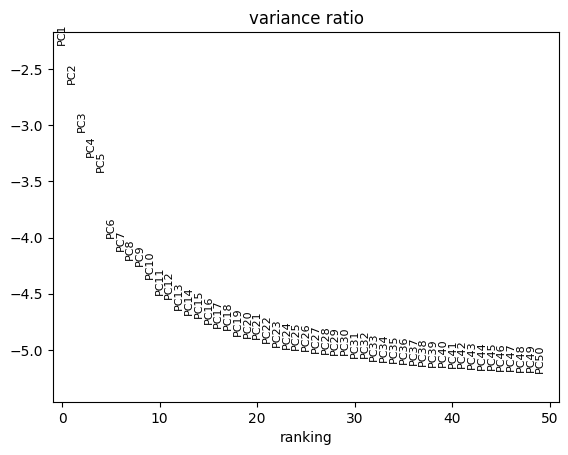

In [28]:
sc.tl.pca(adata_single_top_genes, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_single_top_genes, log=True, n_pcs=50)


In [29]:
sc.pp.neighbors(adata_single_top_genes, n_pcs=30)


In [35]:
adata_single_top_genes


AnnData object with n_obs × n_vars = 55760 × 128
    obs: 'condition', 'cell_type', 'dose_val', 'control', 'condition_name', 'condition_fixed', '_scvi_batch', '_scvi_labels'
    var: 'gene_name', 'n_cells'
    uns: 'non_dropout_gene_idx', 'non_zeros_gene_idx', 'rank_genes_groups_cov_all', 'top_non_dropout_de_20', 'top_non_zero_de_20', '_scvi_uuid', '_scvi_manager_uuid', 'pca', 'neighbors'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [36]:
sc.tl.umap(adata_single_top_genes)


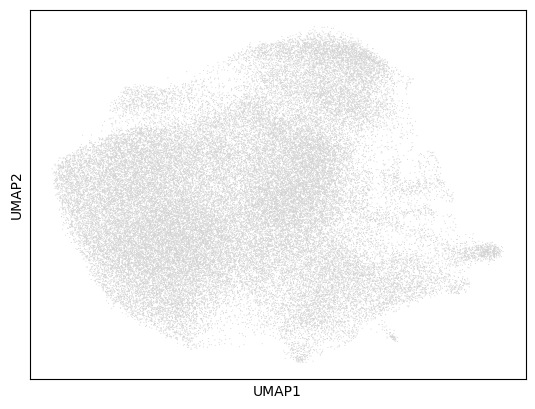

In [37]:
sc.pl.umap(adata_single_top_genes)


In [38]:
!pip install leidenalg

   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 12.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 12.2 MB/s eta 0:00:00


In [58]:
adata_single_top_genes.obs["condition_fixed"].value_counts()

condition_fixed
ctrl      7353
KLF1      1641
BAK1      1171
CEBPE     1039
ETS2      1031
          ... 
CDKN1C     165
NIT1       165
ZBTB10     145
HES7       122
PLK4        97
Name: count, Length: 106, dtype: int64

In [66]:
adata_single_top_genes.obs["UBASH3B"] = adata_single_top_genes.obs["condition_fixed"].apply(lambda x: True if x == "UBASH3B" else False)


In [39]:
sc.tl.leiden(adata_single_top_genes, resolution=0.5)


C:\Users\likef\AppData\Local\Temp\ipykernel_41196\1374982391.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_single_top_genes, resolution=0.5)


In [86]:
adata_without_ctrl = adata_single_top_genes[adata_single_top_genes.obs["condition_fixed"] != "ctrl"].copy()


In [94]:
adata_without_ctrl.obs["cell_type"]


cell_barcode
AAACCTGAGGCATGTG-1    A549
AAACCTGCAGCCTTGG-1    A549
AAACCTGCATCTCCCA-1    A549
AAACCTGGTCTGATTG-1    A549
AAACCTGGTTTCCACC-1    A549
                      ... 
TTTGTCAGTAGGCATG-8    A549
TTTGTCATCAGTACGT-8    A549
TTTGTCATCCACTCCA-8    A549
TTTGTCATCCCAACGG-8    A549
TTTGTCATCTGGCGAC-8    A549
Name: cell_type, Length: 48407, dtype: category
Categories (1, object): ['A549']

In [87]:
sc.tl.leiden(adata_without_ctrl, resolution=0.5)


In [93]:
df_1 = adata_without_ctrl[adata_without_ctrl.obs["leiden"] == "2"].copy()
df_1.obs["condition_fixed"].value_counts()



condition_fixed
ETS2      369
SLC4A1    343
BAK1      250
MAPK1     249
OSR2      214
         ... 
IKZF3      15
CKS1B      12
ATL1       12
TP73       10
PRDM1       6
Name: count, Length: 105, dtype: int64

In [97]:
# Gene programme annotations from Norman et al., 2019

G1_CYCLE = [
    "CDKN1A",
    "CDKN1B",
    "CDKN1C",
]

ERYTHROID = [
    "PTPN1",
]

PIONEER_FACTORS = [
    "FOXA3",
    "HOXA13",
    "HOXC13",
    "TP73",
    "MIDN",
    "HOXC13",
]

GRANULOCYTE_APOPTOSIS = [
    "SPI1",
    "CEBPA",
    "CEBPB",
    "CEBPE",
]

PRO_GROWTH = [
    "KLF1",
    "ELMSAN1",
    "MAP2K3",
    "MAP2K6",
]

MEGAKARYOCYTE = [
    "MAPK1",
    "ETS2",
]

programmes = {
    "G1 cell cycle": G1_CYCLE,
    "Erythroid": ERYTHROID,
    "Pioneer factors": PIONEER_FACTORS,
    "Granulocyte apoptosis": GRANULOCYTE_APOPTOSIS,
    "Pro-growth": PRO_GROWTH,
    "Megakaryocyte": MEGAKARYOCYTE,
}

gene_programme = []

for target_pert in adata_single_top_genes.obs["condition_fixed"]:
    if target_pert == "ctrl":
        gene_programme.append("Control")
        continue

    found_programme = False
    for programme, pert_list in programmes.items():
        for pert in pert_list:
            if pert == target_pert:
                gene_programme.append(programme)
                found_programme = True
                break

    if not found_programme:
        gene_programme.append("Unknown")

adata_single_top_genes.obs["gene_programme"] = gene_programme
adata_single_top_genes.obs["gene_programme"] = adata_single_top_genes.obs["gene_programme"].astype("category")

In [105]:
adata_single_top_genes.obs["gene_programme"].value_counts()

gene_programme
Unknown                  37895
Control                   7353
Pro-growth                3623
Granulocyte apoptosis     2547
Megakaryocyte             1691
Pioneer factors           1456
G1 cell cycle              853
Erythroid                  342
Name: count, dtype: int64

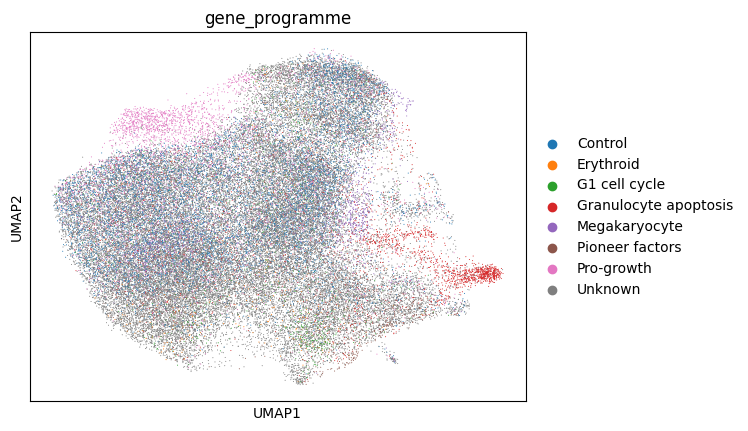

In [98]:
sc.pl.umap(adata_single_top_genes, color=["gene_programme"], frameon=True)


In [103]:
!pip install pertpy

In [104]:
import pertpy as pt
ms_pt = pt.tl.Mixscape()
ms_pt.perturbation_signature(adata_single_top_genes, pert_key="condition_fixed", control="control")


c:\Users\likef\miniconda3\envs\amlg_env\Lib\site-packages\pynndescent\pynndescent_.py:703: RuntimeWarning: divide by zero encountered in log2
  n_iters = max(5, int(round(np.log2(data.shape[0]))))


OverflowError: cannot convert float infinity to integer

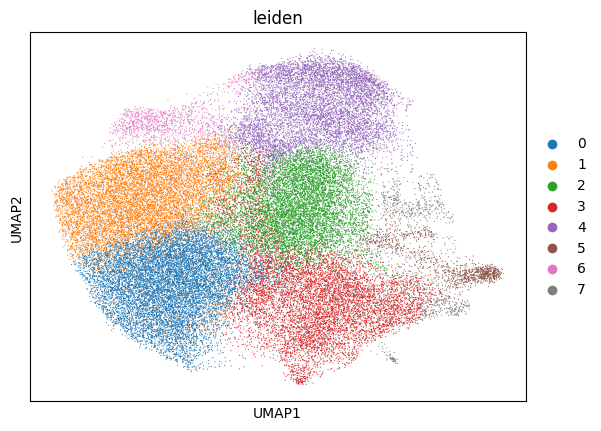

In [88]:
sc.pl.umap(adata_without_ctrl, color=["leiden"], frameon=True)


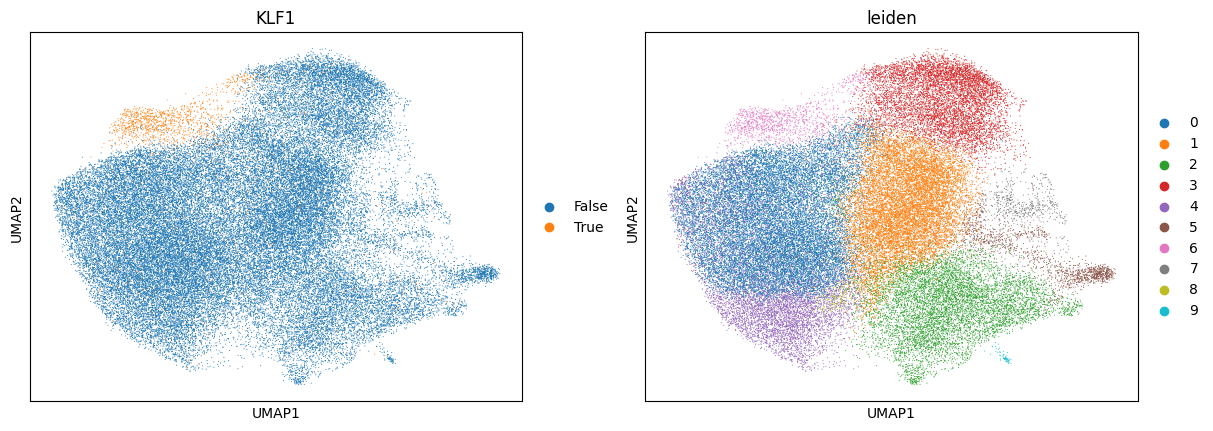

In [68]:
sc.pl.umap(adata_single_top_genes, color=["KLF1", "leiden"], frameon=True)


In [85]:
df_0 = adata_single_top_genes[adata_single_top_genes.obs["leiden"] == "4"].copy()
df_0.obs["condition_fixed"].value_counts()


condition_fixed
ctrl       443
DUSP9      274
CNN1       263
FEV        259
UBASH3B    244
          ... 
NIT1         6
CEBPA        5
HES7         3
ZBTB10       3
COL1A1       1
Name: count, Length: 106, dtype: int64

In [74]:
adata_single_top_genes.obs["leiden"]


leiden
0    17581
1    12134
2     7710
3     7179
4     7136
5     1725
6     1311
7      605
8      318
9       61
Name: count, dtype: int64

In [42]:
sc.pl.rank_genes_groups(adata_single_top_genes, n_genes=10, sharey=False)


KeyError: 'rank_genes_groups'

In [22]:
Y = adata_single_top_genes.obs["condition_fixed"]
print(Y.shape)
print(len(Y.unique()))



(55760,)
106


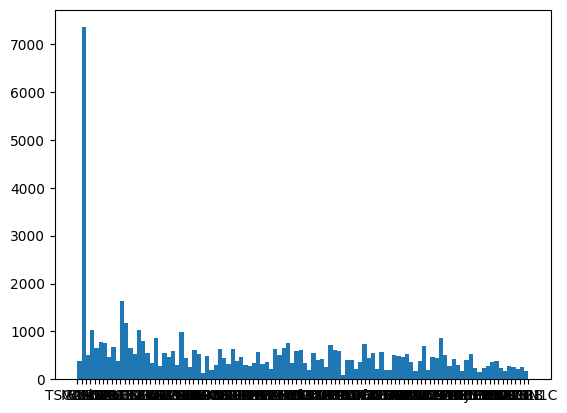

In [11]:
from matplotlib import pyplot as plt
# plot distribution of Y
plt.hist(Y, bins=len(Y.unique()))
plt.show()



In [23]:
numpy_y = Y.to_numpy()
print(numpy_y)


['TSC22D1' 'ctrl' 'MAML2' ... 'CELF2' 'BCORL1' 'MAP4K3']


In [24]:
from collections import Counter

counter = Counter(numpy_y)
print(counter)




Counter({'ctrl': 7353, 'KLF1': 1641, 'BAK1': 1171, 'CEBPE': 1039, 'ETS2': 1031, 'UBASH3B': 983, 'OSR2': 858, 'SLC4A1': 853, 'SET': 790, 'ELMSAN1': 783, 'FOXA1': 761, 'C19orf26': 750, 'MAP2K6': 741, 'FOXF1': 715, 'UBASH3A': 686, 'MEIS1': 682, 'DUSP9': 662, 'MAPK1': 660, 'FEV': 647, 'CNN1': 636, 'MAP7D1': 635, 'RUNX1T1': 631, 'HOXB9': 612, 'DLX2': 606, 'ZBTB1': 602, 'ZBTB25': 590, 'IKZF3': 583, 'PRTG': 581, 'CEBPA': 580, 'TBX2': 564, 'TBX3': 559, 'CLDN6': 544, 'FOXL2': 544, 'ZNF318': 541, 'CBL': 538, 'TGFBR2': 537, 'CBFA2T3': 531, 'KIF2C': 518, 'MAML2': 508, 'IGDCC3': 507, 'SPI1': 506, 'FOSB': 502, 'ISL2': 485, 'AHR': 479, 'COL2A1': 474, 'BCL2L11': 463, 'TMSB4X': 462, 'MAP2K3': 458, 'BCORL1': 456, 'S1PR2': 446, 'SGK1': 446, 'SLC6A9': 441, 'ZC3HAV1': 436, 'SAMD1': 430, 'CEBPB': 422, 'CDKN1B': 413, 'FOXA3': 409, 'ARRDC3': 405, 'BPGM': 393, 'CELF2': 388, 'SNAI1': 380, 'GLB1L2': 378, 'TSC22D1': 376, 'CNNM4': 376, 'PTPN9': 363, 'LYL1': 360, 'PTPN12': 358, 'CSRNP1': 354, 'HOXC13': 343, 'LHX1':

In [15]:
min_threshold = 300

Y = adata_single.obs["condition_fixed"].apply(lambda x: x if counter[x] >= min_threshold else "other")

print(Y.shape)
print(len(Y.unique()))




(55760,)
77


In [16]:
print(Y)

cell_barcode
AAACCTGAGGCATGTG-1    TSC22D1
AAACCTGCACGAAGCA-1       ctrl
AAACCTGCAGCCTTGG-1      MAML2
AAACCTGCATCTCCCA-1      CEBPE
AAACCTGGTATAATGG-1       ctrl
                       ...   
TTTGTCAGTCAGAATA-8       ctrl
TTTGTCATCAGTACGT-8      FOXA3
TTTGTCATCCACTCCA-8      CELF2
TTTGTCATCCCAACGG-8     BCORL1
TTTGTCATCTGGCGAC-8      other
Name: condition_fixed, Length: 55760, dtype: object


In [25]:
condition_group_map = {
    # Đối chứng
    'ctrl': 'Control',
    
    # 1) Transcription Factors (TF) hoặc Co-regulators
    'KLF1': 'TranscriptionFactor',
    'CEBPE': 'TranscriptionFactor',
    'ETS2': 'TranscriptionFactor',
    'FOXA1': 'TranscriptionFactor',
    'OSR2': 'TranscriptionFactor',       # odd-skipped related 2
    'FOXF1': 'TranscriptionFactor',
    'MEIS1': 'TranscriptionFactor',
    'FEV': 'TranscriptionFactor',
    'RUNX1T1': 'TranscriptionFactor',    # đối tác của RUNX1 (AML1)
    'HOXB9': 'TranscriptionFactor',
    'DLX2': 'TranscriptionFactor',
    'ZBTB1': 'TranscriptionFactor',
    'ZBTB25': 'TranscriptionFactor',
    'IKZF3': 'TranscriptionFactor',      # Ikaros family
    'CEBPA': 'TranscriptionFactor',
    'TBX2': 'TranscriptionFactor',
    'TBX3': 'TranscriptionFactor',
    'FOXL2': 'TranscriptionFactor',
    'ZNF318': 'TranscriptionFactor',     # Zinc finger
    'CBFA2T3': 'TranscriptionFactor',    # corepressor (RUNX1 fusion)
    'SPI1': 'TranscriptionFactor',
    'FOSB': 'TranscriptionFactor',       # FOS family
    'ISL2': 'TranscriptionFactor',       # ISL LIM homeobox 2
    'AHR': 'TranscriptionFactor',
    'CEBPB': 'TranscriptionFactor',
    'SNAI1': 'TranscriptionFactor',
    'IRF1': 'TranscriptionFactor',
    'EGR1': 'TranscriptionFactor',
    'POU3F2': 'TranscriptionFactor',
    'LYL1': 'TranscriptionFactor',
    'JUN': 'TranscriptionFactor',
    'HOXA13': 'TranscriptionFactor',
    'HOXC13': 'TranscriptionFactor',
    'RHOXF2BB': 'TranscriptionFactor',   # Rhox homeobox
    'PRDM1': 'TranscriptionFactor',      # BLIMP1
    'CITED1': 'TranscriptionFactor',     # Coactivator for TFs
    'CSRNP1': 'TranscriptionFactor',     # cysteine-serine-rich nuclear protein
    'LHX1': 'TranscriptionFactor',       # LIM homeobox
    'TP73': 'TranscriptionFactor',       # p53 family
    'HNF4A': 'TranscriptionFactor',
    'FOXO4': 'TranscriptionFactor',      # FOXO
    'HES7': 'TranscriptionFactor',       # Hairy and Enhancer of Split
    'MAML2': 'TranscriptionFactor',      # Mastermind-like (Notch coactivator)
    'ZBTB10': 'TranscriptionFactor',     # zinc finger and BTB domain containing
    
    # 2) Apoptosis Regulators
    'BAK1': 'ApoptosisRegulator',
    'BCL2L11': 'ApoptosisRegulator',     # BIM
    
    # 3) MAPK Pathway (kinases, upstream/downstream)
    'MAP2K6': 'MAPKPathway',
    'MAPK1': 'MAPKPathway',
    'MAP2K3': 'MAPKPathway',
    'MAP4K5': 'MAPKPathway',
    'MAP4K3': 'MAPKPathway',
    
    # 4) Phosphatases (PTP, DUSP, UBASH3…)
    'DUSP9': 'Phosphatase',             
    'PTPN9': 'Phosphatase',
    'PTPN12': 'Phosphatase',
    'PTPN1': 'Phosphatase',
    'PTPN13': 'Phosphatase',
    'UBASH3B': 'Phosphatase',            # TULA2
    'UBASH3A': 'Phosphatase',            # TULA
    # (Lưu ý: UBASH3 cũng được gọi là STS phosphatase - có thể xếp "SignalingRegulator")
    
    # 5) Chromatin Remodeling / Epigenetics
    'SET': 'ChromatinRemodeling',
    'ELMSAN1': 'ChromatinRemodeling',
    'KMT2A': 'ChromatinRemodeling',      # MLL1 histone methyltransferase
    'ARID1A': 'ChromatinRemodeling',     # thành phần SWI/SNF
    'SAMD1': 'ChromatinRemodeling',      # sterile alpha motif domain, có thể liên quan epigenetics
    
    # 6) Cell Cycle / Proliferation / Mitosis
    'KIF2C': 'CellCycleRegulator',
    'CDKN1B': 'CellCycleRegulator',
    'STIL': 'CellCycleRegulator',        # liên quan phân bào (centriole duplication)
    'CKS1B': 'CellCycleRegulator',
    'CDKN1A': 'CellCycleRegulator',      # p21
    'CDKN1C': 'CellCycleRegulator',      # p57
    'PLK4': 'CellCycleRegulator',
    
    # 7) Signaling Regulators (Receptors, kinases ngoài MAPK, TF modulators,…)
    'SGK1': 'SignalingRegulator',        # Serum/glucocorticoid-regulated kinase
    'S1PR2': 'SignalingRegulator',       # Sphingosine-1-phosphate receptor
    'ARRDC3': 'SignalingRegulator',      # arrestin domain
    'TGFBR2': 'SignalingRegulator',      # TGF-beta receptor
    'RREB1': 'TranscriptionFactor',      # (cũng có vai trò TF, có thể xếp TF hoặc SignalingRegulator)
    'IGDCC3': 'SignalingRegulator',      # Ig superfamily domain
    'CBL': 'SignalingRegulator',         # E3 ubiquitin ligase (RING finger)
    
    # 8) Transporters / Channels
    'SLC4A1': 'Transporter',
    'SLC6A9': 'Transporter',
    'SLC38A2': 'Transporter',
    'CNNM4': 'Transporter',              # cyclin M4, Mg transporter
    'CLDN6': 'Transporter',              # Claudin 6 (tight junction) - cũng có thể xếp "CellAdhesion"
    
    # 9) Metabolism
    'BPGM': 'Metabolism',                # biphosphoglycerate mutase
    'HK2': 'Metabolism',                 # hexokinase 2
    'NIT1': 'Metabolism',                # nitrilase
    'GLB1L2': 'Metabolism',              # beta-galactosidase-like
    
    # 10) Cytoskeleton / Structural
    'CNN1': 'Cytoskeleton',              # calponin
    'MAP7D1': 'Cytoskeleton',            # microtubule-associated
    'TMSB4X': 'Cytoskeleton',            # Thymosin beta-4
    'COL1A1': 'ExtracellularMatrix',     # collagen
    'COL2A1': 'ExtracellularMatrix',     # collagen
    
    # 11) RNA-binding / Post-transcriptional
    'CELF2': 'RNARegulator',             # CUGBP Elav-like family
    'NCL': 'RNARegulator',               # Nucleolin
    
    # 12) Các nhóm nhỏ khác
    'MIDN': 'Unknown',                   # midnolin (chưa rõ, 1 số tài liệu: nuclear protein?)
    'ATL1': 'MembraneTrafficking',       # atlastin GTPase (ER shaping/fusion)
    'SAMD1': 'ChromatinRemodeling',      # (đã xếp ở trên)
    
    # 13) Các gene ít rõ ràng, orf, “hoặc chưa được tra kỹ”
    'C19orf26': 'Other',     
    'C3orf72': 'Other',
    'KIAA1804': 'Other',
    'ZC3HAV1': 'Other',                  # zinc-finger anti-viral protein
    'IGDCC3': 'SignalingRegulator',      # (đã xếp)
    
    # Nếu còn sót gene nào trong danh sách gốc, ta gộp "Other" hoặc "Unknown":
    # (Dưới đây là vài ví dụ còn sót)
    'BCORL1': 'TranscriptionFactor',     # corepressor BCOR
    'MAML2': 'TranscriptionFactor',      # (đã xếp ở TF)
    'SAMD1': 'ChromatinRemodeling',      # (đã xếp)
}

# Các gene chưa liệt kê hết ở trên?
# Ta bổ sung tiếp cho đủ 106 entry. 
# Dưới đây là những gene có trong dict gốc mà chưa gán:
additional_map = {
    'UBASH3B': 'Phosphatase',  # nêu trên
    'UBASH3A': 'Phosphatase',  # nêu trên
    'PRTG': 'Unknown',         # protogenin, 1 số tài liệu: Ig superfamily, neural dev
    'TMSB4X': 'Cytoskeleton',
    'BCORL1': 'TranscriptionFactor', # nêu trên
    'SAMD1': 'ChromatinRemodeling',
    'FOXA3': 'TranscriptionFactor',
    'ARRDC3': 'SignalingRegulator',
    'CNNM4': 'Transporter',
    'PTPN9': 'Phosphatase',
    'LHX1': 'TranscriptionFactor',
    'PTPN1': 'Phosphatase',
    'IER5L': 'Unknown',        # Immediate Early Response 5-like, có thể TF, ít tài liệu
    'RREB1': 'TranscriptionFactor', # or Signaling
    'CDKN1B': 'CellCycleRegulator',
    'TSC22D1': 'TranscriptionFactor', # TSC22 domain family (có thể co-repressor)
    'CCSNP1': 'TranscriptionFactor',  # (typo: CSRNP1?), đã xếp
    'CSRNP1': 'TranscriptionFactor',
    # ...
}

# Gộp hai dict lại (map chính + bổ sung). 
condition_group_map.update(additional_map)

# Kiểm tra cuối cùng: những gene còn thiếu so với dict gốc
# => Mình minh họa trong phần trả lời, hoặc bạn chạy code để dò.




In [26]:
Y = adata_single_top_genes.obs["condition_fixed"].map(condition_group_map).fillna("Other")

print(len(Y.unique()))


16


In [27]:
counter_Y = Counter(Y)
print(counter_Y)




Counter({'TranscriptionFactor': 23497, 'Control': 7353, 'Phosphatase': 3620, 'SignalingRegulator': 2879, 'Transporter': 2494, 'MAPKPathway': 2458, 'ChromatinRemodeling': 2370, 'CellCycleRegulator': 1925, 'Other': 1827, 'Cytoskeleton': 1733, 'ApoptosisRegulator': 1634, 'Metabolism': 1185, 'Unknown': 1164, 'ExtracellularMatrix': 731, 'RNARegulator': 585, 'MembraneTrafficking': 305})


In [107]:
# drop unknown
adata = adata_single_top_genes[adata_single_top_genes.obs["gene_programme"] != "Unknown"].copy()

X = adata.X.toarray()
y = adata.obs["gene_programme"].to_numpy()



In [108]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X, y = shuffle(X, y, random_state=42)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [60]:
# apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# print number of components
print(f"Number of components: {pca.n_components_}")



Number of components: 103


In [61]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, Y_train = smote.fit_resample(X_train, Y_train)


In [109]:
from xgboost import XGBClassifier
import numpy as np

# y chứa label 0..15 (16 lớp)
class_counts = np.bincount(Y_train)
total_samples = len(Y_train)
num_classes = len(set(Y_train))

# Trọng số cho mỗi lớp = total_samples / (num_classes * class_counts[c])
class_weights = {c: total_samples/(num_classes*count) for c, count in enumerate(class_counts)}

# Tạo vector weight cho từng sample
sample_weights = [class_weights[label] for label in Y_train]

# Huấn luyện
model = XGBClassifier(
    objective='multi:softmax',  # hoặc 'multi:softprob'
    eval_metric='mlogloss',
    # ... các hyperparams khác
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
)
model.fit(X_train, Y_train, sample_weight=sample_weights)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, objective='multi:softmax', ...)

In [131]:
from sklearn.ensemble import RandomForestClassifier

clf2 = RandomForestClassifier(n_estimators=50, random_state=42)
clf2.fit(X_train, Y_train, sample_weight=sample_weights)


RandomForestClassifier(n_estimators=50, random_state=42)

In [140]:
from sklearn.svm import SVC
clf3 = SVC(kernel='rbf', random_state=42, probability=True)
clf3.fit(X_train, Y_train, sample_weight=sample_weights)


SVC(probability=True, random_state=42)

In [141]:
model = clf3


In [142]:
# accuracy of train set
y_pred = model.predict(X_train)
accuracy = np.mean(y_pred == Y_train)
print(f"Accuracy of train set: {accuracy:.2f}")

# accuracy of test set
y_pred = model.predict(X_test)
accuracy = np.mean(y_pred == Y_test)
print(f"Accuracy of test set: {accuracy:.2f}")


Accuracy of train set: 0.81
Accuracy of test set: 0.73


In [123]:
class_weights

{0: 0.347112255306747,
 1: 7.451511991657977,
 2: 2.9937159614578968,
 3: 1.0018225150707978,
 4: 1.5090275578080456,
 5: 1.7525444512568975,
 6: 0.7045252883762201}

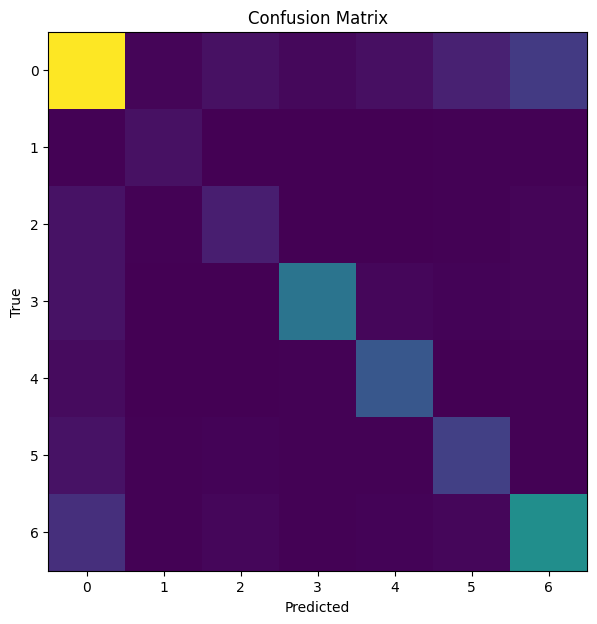

In [143]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix

# plot confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
plt.figure(figsize=(10, 7))
plt.imshow(conf_matrix)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



In [144]:
# f1 score macro
from sklearn.metrics import f1_score
f1_score(Y_test, y_pred, average='macro')



0.7012844370295567

FileNotFoundError: [Errno 2] No such file or directory: 'logs/roc_curves.png'

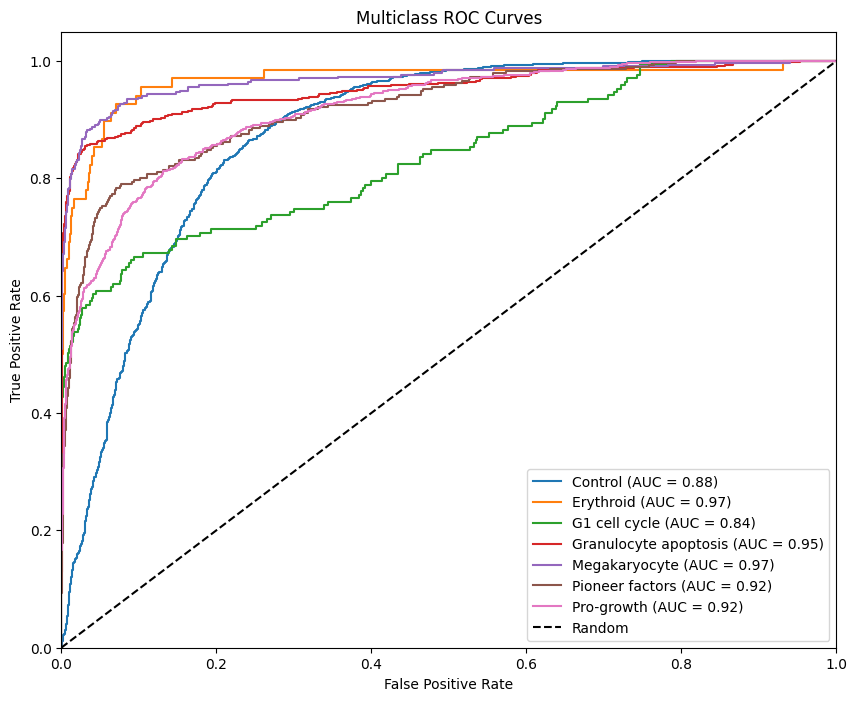

In [145]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np
import matplotlib.pyplot as plt

def plot_multiclass_roc(y_test, y_pred_proba, n_classes, class_labels=None):
    """
    Plot ROC curves for multiclass classification.
    
    Args:
        y_test: True labels
        y_pred_proba: Predicted probabilities from model.predict_proba()
        n_classes: Number of classes
        class_labels: List of class names (optional)
    """
    # Compute ROC curve and ROC area for each class
    y_test_bin = label_binarize(y_test, classes=range(n_classes))
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    plt.figure(figsize=(10, 8))
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
        
        label = f'Class {i}' if class_labels is None else class_labels[i]
        plt.plot(fpr[i], tpr[i], label=f'{label} (AUC = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Multiclass ROC Curves')
    plt.legend(loc="lower right")
    
    # Save the plot
    plt.savefig(f"logs/roc_curves.png")
    plt.close()
    
    # Return average AUC
    return np.mean(list(roc_auc.values()))

# Use it in your code
y_pred_proba = model.predict_proba(X_test)
class_labels = label_encoder.classes_  # if you used LabelEncoder
avg_auc = plot_multiclass_roc(Y_test, y_pred_proba, n_classes=len(class_labels), class_labels=class_labels)

# Add AUC score to your evaluation file
# with open(f"{LOGGING_DIR}/evaluation.txt", "a") as f:
#     f.write(f"\nAverage ROC AUC: {avg_auc:.4f}\n")

In [130]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))



              precision    recall  f1-score   support

           0       0.60      0.97      0.74      1471
           1       0.79      0.40      0.53        68
           2       0.88      0.29      0.43       171
           3       0.92      0.69      0.79       509
           4       0.89      0.62      0.73       338
           5       0.73      0.32      0.44       291
           6       0.94      0.47      0.62       725

    accuracy                           0.70      3573
   macro avg       0.82      0.53      0.61      3573
weighted avg       0.77      0.70      0.68      3573

